In [ ]:
import supy as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functions.util import *
from matplotlib import cm

import seaborn as sns

sp.show_version()


SuPy version: 2025.6.2.dev180
-------------


In [ ]:
# Aggregated Typology data using DB
yaml_path = 'C:/GitHub/SUEWS_DB_Typology_test/postsub/fa_1.yml'

config = sp.data_model.init_config_from_yaml(yaml_path)
df_state_init = config.to_df_state()
grid = df_state_init.index[0]

df_forcing = sp.load_forcing_grid(yaml_path, grid, df_state_init = df_state_init)

# Only Landshövdingegus
yaml_path2 = 'C:/GitHub/SUEWS_DB_Typology_test/postsub/fa_notypo.yml'
config2 = sp.data_model.init_config_from_yaml(yaml_path2)
df_state_init2 = config2.to_df_state()

In [3]:
df_state_init['netradiationmethod'] = 3
df_state_init['storageheatmethod'] = 6

df_state_init2['netradiationmethod'] = 3
df_state_init2['storageheatmethod'] = 6


# Med typologi

In [4]:
fy = '2017'

df_output_typo_1_5, df_final_state_typo_1_5 = sp.run_supy(df_forcing.loc[fy], df_state_init.loc[[1,2,3,4,5]], chunk_day=31)
df_output_typo_6_10, df_final_state_typo_6_10 = sp.run_supy(df_forcing.loc[fy], df_state_init.loc[[6,7,8,9,10]], chunk_day=31)
df_output_typo_11_15, df_final_state_typo_11_15 = sp.run_supy(df_forcing.loc[fy], df_state_init.loc[[11,12,13,14,15]], chunk_day=31)

fy = '2018'
sty= '2018-01-01'
df_output_typo_1_5, df_final_state_typo_1_5 = sp.run_supy(df_forcing.loc[fy], df_final_state_typo_1_5.loc[sty], chunk_day=31)
df_output_typo_6_10, df_final_state_typo_6_10 = sp.run_supy(df_forcing.loc[fy], df_final_state_typo_6_10.loc[sty], chunk_day=31)
df_output_typo_11_15, df_final_state_typo_11_15 = sp.run_supy(df_forcing.loc[fy], df_final_state_typo_11_15.loc[sty], chunk_day=31)

df_typo = pd.concat([df_output_typo_1_5.SUEWS, df_output_typo_6_10.SUEWS, df_output_typo_11_15.SUEWS])

2025-07-01 12:52:19,768 - SuPy - INFO - ====================
2025-07-01 12:52:19,768 - SuPy - INFO - SUEWS version: 2025.6.2.dev180
2025-07-01 12:52:19,768 - SuPy - INFO - Simulation period:
2025-07-01 12:52:19,768 - SuPy - INFO -   Start: 2017-01-01 00:00:00
2025-07-01 12:52:19,768 - SuPy - INFO -   End: 2017-12-31 23:55:00
2025-07-01 12:52:19,768 - SuPy - INFO - 
2025-07-01 12:52:19,768 - SuPy - INFO - No. of grids: 5
2025-07-01 12:52:19,768 - SuPy - INFO - SUEWS is running in serial mode
2025-07-01 12:52:20,224 - SuPy - INFO - Forcing is split into 12 chunks for less memory consumption.
2025-07-01 12:53:28,205 - SuPy - INFO - Execution time: 68.4 s
2025-07-01 12:53:28,205 - SuPy - INFO - ====================

2025-07-01 12:53:28,213 - SuPy - INFO - ====================
2025-07-01 12:53:28,213 - SuPy - INFO - SUEWS version: 2025.6.2.dev180
2025-07-01 12:53:28,213 - SuPy - INFO - Simulation period:
2025-07-01 12:53:28,213 - SuPy - INFO -   Start: 2017-01-01 00:00:00
2025-07-01 12:53:2

In [ ]:
sp.save_supy(
    pd.concat([df_output_typo_1_5, df_output_typo_6_10, df_output_typo_11_15]), 
    pd.concat([df_final_state_typo_1_5, df_final_state_typo_6_10, df_final_state_typo_11_15]),
    path_dir_save= 'C:/GitHub/SUEWS_DB_Typology_test/postsub/typo' )

# UTan typologi

In [9]:
fy = '2017'

df_output_notypo_1_5, df_final_state_notypo_1_5 = sp.run_supy(df_forcing.loc[fy], df_state_init2.loc[[1,2,3,4,5]], chunk_day=31)
df_output_notypo_6_10, df_final_state_notypo_6_10 = sp.run_supy(df_forcing.loc[fy], df_state_init2.loc[[6,7,8,9,10]], chunk_day=31)
df_output_notypo_11_15, df_final_state_notypo_11_15 = sp.run_supy(df_forcing.loc[fy], df_state_init2.loc[[11,12,13,14,15]], chunk_day=31)

fy = '2018'
sty= '2018-01-01'
df_output_notypo_1_5, df_final_state_notypo_1_5 = sp.run_supy(df_forcing.loc[fy], df_final_state_notypo_1_5.loc[sty], chunk_day=31)
df_output_notypo_6_10, df_final_state_notypo_6_10 = sp.run_supy(df_forcing.loc[fy], df_final_state_notypo_6_10.loc[sty], chunk_day=31)
df_output_notypo_11_15, df_final_state_notypo_11_15 = sp.run_supy(df_forcing.loc[fy], df_final_state_notypo_11_15.loc[sty], chunk_day=31)

df_notypo = pd.concat([df_output_notypo_1_5.SUEWS, df_output_notypo_6_10.SUEWS, df_output_notypo_11_15.SUEWS])

2025-07-01 13:17:33,776 - SuPy - INFO - ====================
2025-07-01 13:17:33,777 - SuPy - INFO - SUEWS version: 2025.6.2.dev180
2025-07-01 13:17:33,777 - SuPy - INFO - Simulation period:
2025-07-01 13:17:33,777 - SuPy - INFO -   Start: 2018-01-01 00:00:00
2025-07-01 13:17:33,777 - SuPy - INFO -   End: 2018-12-31 19:00:00
2025-07-01 13:17:33,777 - SuPy - INFO - 
2025-07-01 13:17:33,777 - SuPy - INFO - No. of grids: 5
2025-07-01 13:17:33,777 - SuPy - INFO - SUEWS is running in serial mode
2025-07-01 13:17:34,153 - SuPy - INFO - Forcing is split into 12 chunks for less memory consumption.
2025-07-01 13:18:44,537 - SuPy - INFO - Execution time: 70.8 s
2025-07-01 13:18:44,538 - SuPy - INFO - ====================

2025-07-01 13:18:44,727 - SuPy - INFO - ====================
2025-07-01 13:18:44,727 - SuPy - INFO - SUEWS version: 2025.6.2.dev180
2025-07-01 13:18:44,727 - SuPy - INFO - Simulation period:
2025-07-01 13:18:44,727 - SuPy - INFO -   Start: 2018-01-01 00:00:00
2025-07-01 13:18:4

In [ ]:
sp.save_supy(
    pd.concat([df_output_notypo_1_5, df_output_notypo_6_10, df_output_notypo_11_15]), 
    pd.concat([df_final_state_notypo_1_5, df_final_state_notypo_6_10, df_final_state_notypo_11_15]),
    path_dir_save= 'C:/GitHub/SUEWS_DB_Typology_test/postsub/notypo' )

# LOAD DATA

In [45]:
df_notypo = pd.DataFrame()

path_notypo = 'C:/GitHub/SUEWS_DB_Typology_test/postsub/notypo/'

for gridno in range(1,16):

    df = pd.read_csv(path_notypo +f'{gridno}_2018_SUEWS_60.txt', delim_whitespace=True)

    df['grid'] = gridno
    # Create a datetime column from Year, DOY (Day of Year), Hour and Min
    df['Datetime'] = pd.to_datetime(df[['Year', 'DOY', 'Hour', 'Min']].astype(str).agg('-'.join, axis=1), format='%Y-%j-%H-%M')

    # Set the datetime column as the index
    df.set_index(['grid','Datetime'], inplace=True)
    df = df.drop(columns = ['Year','DOY','Hour','Min'])

    df_notypo = pd.concat([df_notypo, df])


df_typo = pd.DataFrame()

path_typo = 'C:/GitHub/SUEWS_DB_Typology_test/postsub/typo/'


for gridno in range(1,16):

    df = pd.read_csv(path_typo +f'{gridno}_2018_SUEWS_60.txt', delim_whitespace=True)

    df['grid'] = gridno
    # Create a datetime column from Year, DOY (Day of Year), Hour and Min
    df['Datetime'] = pd.to_datetime(df[['Year', 'DOY', 'Hour', 'Min']].astype(str).agg('-'.join, axis=1), format='%Y-%j-%H-%M')

    # Set the datetime column as the index
    df.set_index(['grid','Datetime'], inplace=True)
    df = df.drop(columns = ['Year','DOY','Hour','Min'])

    df_typo = pd.concat([df_typo, df])

diff = df_notypo - df_typo 

In [59]:
diff

Dectime  Kdown     Kup  Ldown     Lup   Tsurf  \
grid Datetime                                                             
1    2018-01-01 01:00:00      0.0    0.0  0.0000    0.0  0.1370  0.0000   
     2018-01-01 02:00:00      0.0    0.0  0.0000    0.0  0.1402  0.0000   
     2018-01-01 03:00:00      0.0    0.0  0.0000    0.0  0.1369  0.0000   
     2018-01-01 04:00:00      0.0    0.0  0.0000    0.0  0.1313  0.0000   
     2018-01-01 05:00:00      0.0    0.0  0.0000    0.0  0.1290  0.0000   
...                           ...    ...     ...    ...     ...     ...   
15   2018-12-31 15:00:00      0.0    0.0 -0.0200    0.0  0.5479 -0.0005   
     2018-12-31 16:00:00      0.0    0.0 -0.0014    0.0  0.5380  0.0000   
     2018-12-31 17:00:00      0.0    0.0  0.0000    0.0  0.5203  0.0000   
     2018-12-31 18:00:00      0.0    0.0  0.0000    0.0  0.5230  0.0000   
     2018-12-31 19:00:00      0.0    0.0  0.0000    0.0  0.5321  0.0000   

                              QN   QF      QS      QH  ...  MeltWater  \
grid Datetime                                          ...              
1    2018-01-01 01:00:00 -0.1369  0.0 -0.0429 -0.0443  ...        0.0   
     2018-01-01 02:00:00 -0.1402  0.0 -0.0440 -0.0434  ...        0.0   
     2018-01-01 03:00:00 -0.1369  0.0 -0.0428 -0.0679  ...        0.0   
     2018-01-01 04:00:00 -0.1314  0.0 -0.0407 -0.0680  ...        0.0   
     2018-01-01 05:00:00 -0.1289  0.0 -0.0400 -0.0687  ...        0.0   
...                          ...  ...     ...     ...  ...        ...   
15   2018-12-31 15:00:00 -0.5280  0.0  1.2718 -1.8415  ...        0.0   
     2018-12-31 16:00:00 -0.5366  0.0  1.3059 -1.8763  ...        0.0   
     2018-12-31 17:00:00 -0.5203  0.0  1.3474 -1.8913  ...        0.0   
     2018-12-31 18:00:00 -0.5230  0.0  1.3662 -1.9084  ...        0.0   
     2018-12-31 19:00:00 -0.5321  0.0  1.3670 -1.9183  ...        0.0   

                          MeltWStore  SnowCh  SnowRPaved  SnowRBldgs      Ts  \
grid Datetime                                                                  
1    2018-01-01 01:00:00         0.0     0.0         0.0         0.0 -0.0064   
     2018-01-01 02:00:00         0.0     0.0         0.0         0.0 -0.0052   
     2018-01-01 03:00:00         0.0     0.0         0.0         0.0 -0.0040   
     2018-01-01 04:00:00         0.0     0.0         0.0         0.0 -0.0040   
     2018-01-01 05:00:00         0.0     0.0         0.0         0.0 -0.0039   
...                              ...     ...         ...         ...     ...   
15   2018-12-31 15:00:00         0.0     0.0         0.0         0.0 -0.0559   
     2018-12-31 16:00:00         0.0     0.0         0.0         0.0 -0.0559   
     2018-12-31 17:00:00         0.0     0.0         0.0         0.0 -0.0569   
     2018-12-31 18:00:00         0.0     0.0         0.0         0.0 -0.0590   
     2018-12-31 19:00:00         0.0     0.0         0.0         0.0 -0.0589   

                              T2      Q2     U10     RH2  
grid Datetime                                             
1    2018-01-01 01:00:00 -0.0035  0.0003 -0.0007  0.0274  
     2018-01-01 02:00:00 -0.0027  0.0003 -0.0007  0.0225  
     2018-01-01 03:00:00 -0.0017  0.0001 -0.0004  0.0125  
     2018-01-01 04:00:00 -0.0016  0.0002 -0.0004  0.0125  
     2018-01-01 05:00:00 -0.0014  0.0002 -0.0004  0.0123  
...                          ...     ...     ...     ...  
15   2018-12-31 15:00:00 -0.0084  0.0003 -0.0015  0.0539  
     2018-12-31 16:00:00 -0.0086  0.0002 -0.0016  0.0542  
     2018-12-31 17:00:00 -0.0088  0.0001 -0.0017  0.0554  
     2018-12-31 18:00:00 -0.0091  0.0001 -0.0017  0.0572  
     2018-12-31 19:00:00 -0.0092  0.0001 -0.0018  0.0572  

[131325 rows x 86 columns]

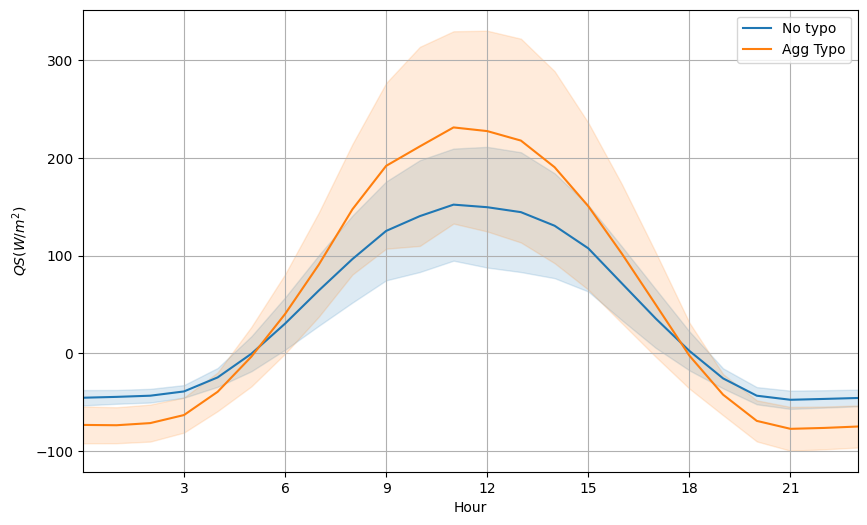

In [77]:
alphav =0.15

var = 'QS'

june_2018 = df_notypo.loc[1].loc['2018-06':'2018-07':]
june_2018['hour'] = june_2018.index.hour

# Beräkna diurnala medelvärden och standardavvikelse
diurnal_averages = june_2018.groupby('hour')[var].mean()
diurnal_std = june_2018.groupby('hour')[var].std()

plt.figure(figsize=(10, 6))
plt.plot(diurnal_averages.index, diurnal_averages, color = 'tab:blue', linestyle = '-', label= 'No typo')
plt.fill_between(diurnal_averages.index, diurnal_averages - diurnal_std, diurnal_averages + diurnal_std, alpha=alphav, color = 'tab:blue')

june_2018 = df_typo.loc[11].loc['2018-06']

june_2018['hour'] = june_2018.index.hour

# Beräkna diurnala medelvärden och standardavvikelse
diurnal_averages = june_2018.groupby('hour')[var].mean()
diurnal_std = june_2018.groupby('hour')[var].std()

plt.plot(diurnal_averages.index, diurnal_averages, color = 'tab:orange',linestyle =  '-', label='Agg Typo')
plt.fill_between(diurnal_averages.index, diurnal_averages - diurnal_std, diurnal_averages + diurnal_std, alpha=alphav, color = 'tab:orange')

plt.xlim(xmin=0, xmax = 23)

plt.xticks([3, 6, 9, 12, 15, 18, 21])
plt.xlabel('Hour')
plt.ylabel(f'${var} (W/m^2$)')
# plt.title('Diurnala medelvärden för juni 2018 med felmarginaler')
plt.legend()
plt.grid(True)
plt.show()


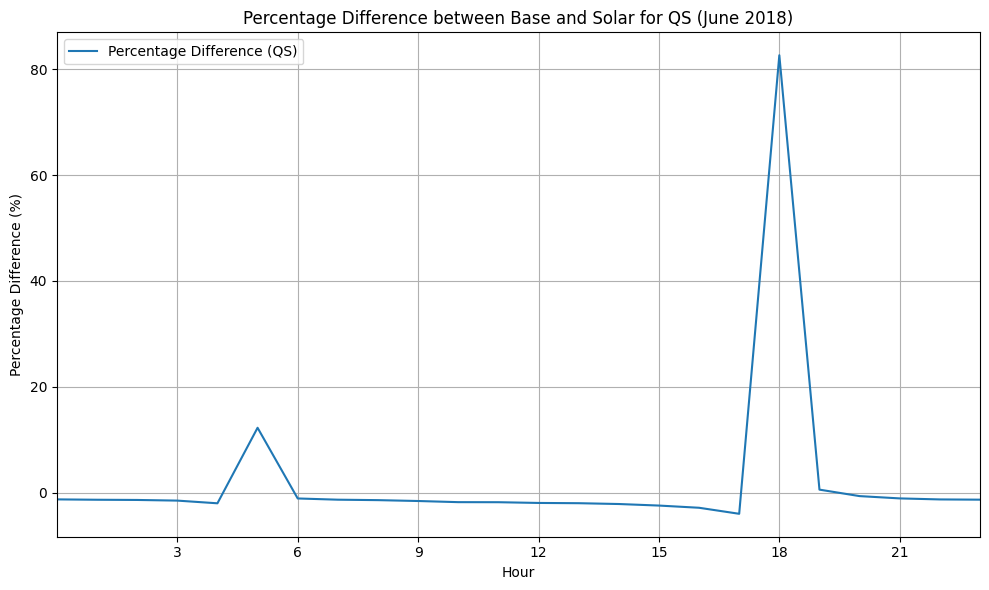

In [72]:
# Anta att df_notypo och df_typo är dina DataFrames
alphav = 0.15
var = 'QS'
# Slice juni 2018 för base och solar
june_2018_base = df_notypo.loc[1].loc['2018-06']
june_2018_base['hour'] = june_2018_base.index.hour

june_2018_solar = df_typo.loc[1].loc['2018-06']
june_2018_solar['hour'] = june_2018_solar.index.hour

# Beräkna diurnala medelvärden och standardavvikelse för QS
diurnal_averages_base_QS = june_2018_base.groupby('hour')[var].mean()
diurnal_std_base_QS = june_2018_base.groupby('hour')[var].std()

diurnal_averages_solar_QS = june_2018_solar.groupby('hour')[var].mean()
diurnal_std_solar_QS = june_2018_solar.groupby('hour')[var].std()

# Beräkna procentuell skillnad mellan base och solar för QS
percentage_difference_QS = ((diurnal_averages_solar_QS - diurnal_averages_base_QS) / diurnal_averages_base_QS) * 100

# Skapa subplot för procentuell skillnad
fig_diff, ax_diff = plt.subplots(figsize=(10, 6))
sns.lineplot(x=percentage_difference_QS.index, y=percentage_difference_QS, ax=ax_diff, color='tab:blue', label='Percentage Difference (QS)')
ax_diff.set_xlim(0, 23)
ax_diff.set_xticks([3, 6, 9, 12, 15, 18, 21])
ax_diff.set_xlabel('Hour')
ax_diff.set_ylabel('Percentage Difference (%)')
ax_diff.legend()
ax_diff.grid(True)
ax_diff.set_title('Percentage Difference between Base and Solar for QS (June 2018)')

plt.tight_layout()
plt.show()



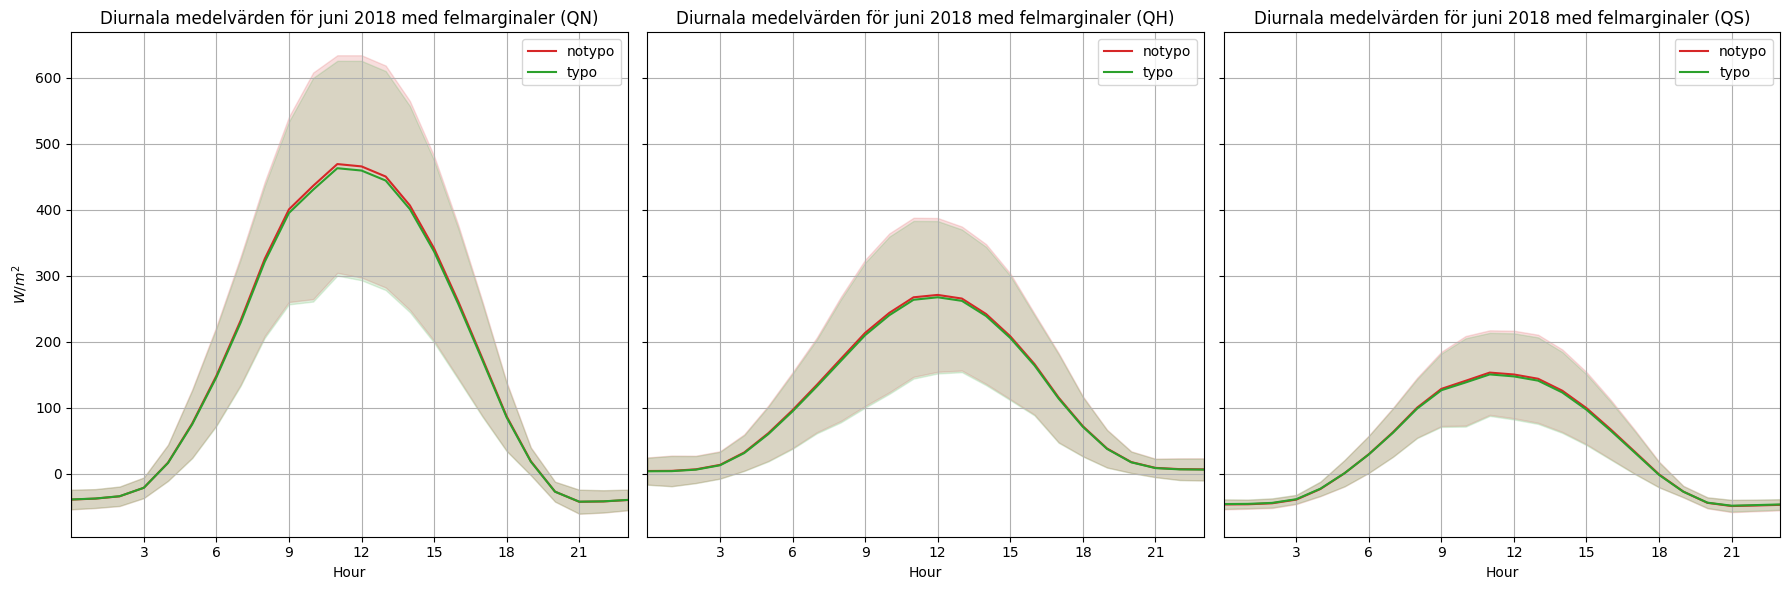

In [57]:
# Anta att df_notypo och df_typo är dina DataFrames och 'variable' är kolumnen du vill beräkna medelvärden för
alphav = 0.15
variables = ['QN', 'QH', 'QS']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, var in enumerate(variables):
    june_2018_notypo = df_notypo.loc[1].loc['2018-06']
    june_2018_notypo['hour'] = june_2018_notypo.index.hour

    diurnal_averages_notypo = june_2018_notypo.groupby('hour')[var].mean()
    diurnal_std_notypo = june_2018_notypo.groupby('hour')[var].std()

    sns.lineplot(x=diurnal_averages_notypo.index, y=diurnal_averages_notypo, ax=axes[i], color='tab:red', label='notypo')
    axes[i].fill_between(diurnal_averages_notypo.index, diurnal_averages_notypo - diurnal_std_notypo, diurnal_averages_notypo + diurnal_std_notypo, alpha=alphav, color='tab:red')

    june_2018_typo = df_typo.loc[1].loc['2018-06']
    june_2018_typo['hour'] = june_2018_typo.index.hour

    diurnal_averages_typo = june_2018_typo.groupby('hour')[var].mean()
    diurnal_std_typo = june_2018_typo.groupby('hour')[var].std()

    sns.lineplot(x=diurnal_averages_typo.index, y=diurnal_averages_typo, ax=axes[i], color='tab:green', label='typo')
    axes[i].fill_between(diurnal_averages_typo.index, diurnal_averages_typo - diurnal_std_typo, diurnal_averages_typo + diurnal_std_typo, alpha=alphav, color='tab:green')

    axes[i].set_xlim(0, 23)
    axes[i].set_xticks([3, 6, 9, 12, 15, 18, 21])
    axes[i].set_xlabel('Hour')
    axes[i].set_ylabel(f'$W/m^2$')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].set_title(f'Diurnala medelvärden för juni 2018 med felmarginaler ({var})')

plt.tight_layout()
plt.show()

<Axes: xlabel='datetime'>

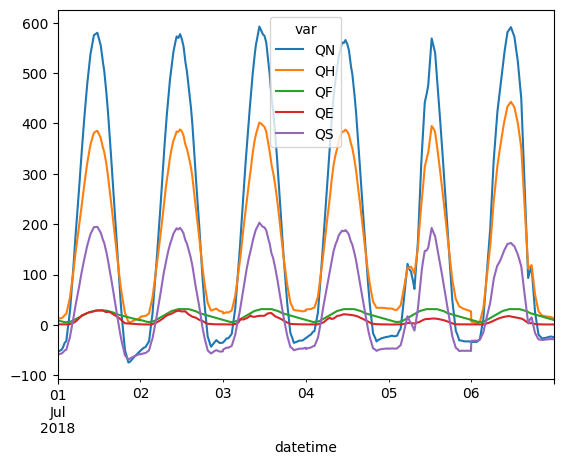

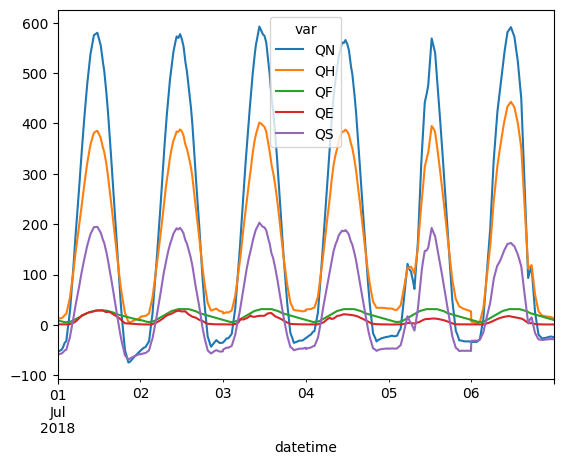

In [16]:
df_output_typo_1_5.SUEWS.loc[2].loc['2018-07-01':'2018-07-06',['QN','QH','QF','QE','QS']].plot()
df_output_notypo_1_5.SUEWS.loc[2].loc['2018-07-01':'2018-07-06',['QN','QH','QF','QE','QS']].plot()

<Axes: xlabel='datetime'>

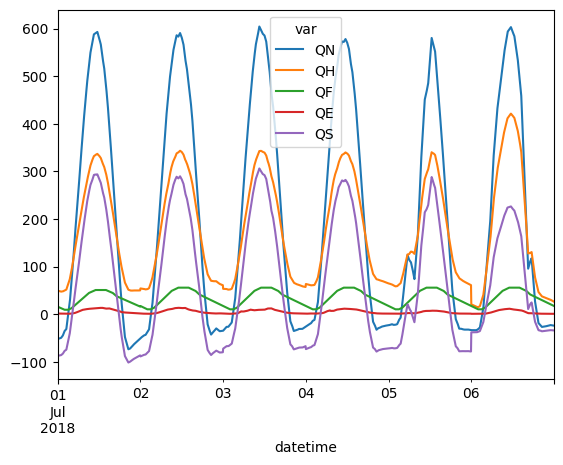

In [51]:
df_output_typo_1_5.SUEWS.loc[5].loc['2018-07-01':'2018-07-06',['QN','QH','QF','QE','QS']].plot()

In [27]:
def SUEWS_txt_to_df( suews_output_path):
    df_output_suews = pd.read_csv(suews_output_path, delim_whitespace = True)
    df_output_suews['Datetime'] = pd.to_datetime(df_output_suews[['Year', 'DOY', 'Hour', 'Min']].astype(str).agg('-'.join, axis=1), format='%Y-%j-%H-%M')
    df_output_suews.set_index('Datetime', inplace=True)

    return df_output_suews

In [28]:
typ = SUEWS_txt_to_df(r'C:\GitHub\SUEWS_DB_Typology_test\postsub\typo\11_2018_SUEWS_60.txt')
notyp = SUEWS_txt_to_df(r'C:\GitHub\SUEWS_DB_Typology_test\postsub\notypo\11_2018_SUEWS_60.txt')


<Axes: xlabel='Datetime'>

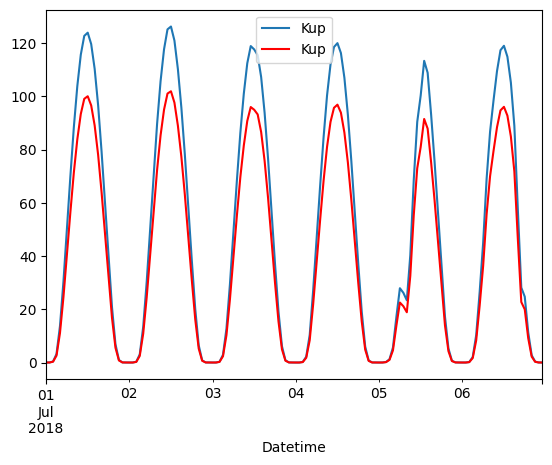

In [38]:
diff = typ-notyp

ax= typ.loc['2018-07-01':'2018-07-06',['Kup']].plot()
notyp.loc['2018-07-01':'2018-07-06',['Kup']].plot(color ='red', ax = ax)




In [26]:
diff = typ-notyp
diff['QS'].idxmax()

typ.iloc[5243]

Year       2018.0000
DOY         219.0000
Hour         12.0000
Min           0.0000
Dectime     218.5000
             ...    
Ts           34.6334
T2           27.1138
Q2            9.9907
U10           2.1280
RH2          44.8701
Name: 5243, Length: 90, dtype: float64